# Introduction

This notebook serves as an introduction to the basic methods of data analysis. It supports the physics lab exercises at the Charles University. Python is the programming language of choice. The notebook tackles several topics, such as uncertainty estimation and propagation, data visualization, data fitting, and statistical analysis. The notebook is designed to be interactive, so feel free to modify the code and experiment with it. However, it is not meant as a statistics course. For a more in-depth understanding of the statistical topics, we recommend the following resources:
- Full online course Statisical Methods in High Energy Physics:
  - [YouTube videos](https://www.youtube.com/@statisticalmethods6041/videos)
  - [Skript](https://ipnp.cz/wp-content/uploads/2021/01/stat_met_script-1.pdf) for the course
- The course is heavily based on the book [Statistical Data Analysis](https://www.pp.rhul.ac.uk/~cowan/sda/) by Glen Cowan.

What concerns programming, we highly recommend using AI assistants. They are very strong in suggesting solutions based on python libraries used in this notebook. As students, you can ask for a free license for the [GitHub Student Developer Pack](https://education.github.com/pack). This pack includes the [GitHub Copilot](https://copilot.github.com/) AI assistant. There is also an AI assistant in the Google Colab notebook.


## Python tools for data analysis

Python is a versatile programming language that is widely used in data analysis. It has a rich ecosystem of libraries that provide tools for data manipulation, visualization, and analysis. The key libraries used in this notebook are:
- [NumPy](https://numpy.org/): a library for numerical computing that provides support for arrays and matrices, as well as mathematical functions. NumPy tutorial for beginners can be found [here](https://numpy.org/doc/stable/user/quickstart.html). A jupyter notebook with NumPy basics is [here](https://colab.research.google.com/drive/1LJSx6HNsVV4MpAtximOq9UXAeTehNz6O?usp=sharing).
- [Matplotlib](https://matplotlib.org/): a library for creating static, animated, and interactive visualizations in Python. Matplotlib tutorial for beginners can be found [here](https://matplotlib.org/stable/users/explain/quick_start.html). A jupyter notebook with Matplotlib basics is [here](https://colab.research.google.com/drive/1wRoxCMJU9iYyE8jax5akm_-rXWxilqtd?usp=sharing).
- [SciPy](https://www.scipy.org/): a library that builds on NumPy and provides additional functionality for scientific computing. We will use it just for fitting in this notebook.
- [Uncertainties](https://pythonhosted.org/uncertainties/): a library for uncertainty propagation.

This notebook can be run in an interactive environment, such as Jupyter Notebook or JupyterLab. It is recommended to install the required libraries using the following command. You might want to create a virtual environment first:

```bash
python -m venv venv
source venv/bin/activate # On Windows, use venv\Scripts\activate.ps1
```

Then install the required libraries:
```bash
pip install numpy matplotlib scipy pandas uncertainties
```

You can also run the notebook in an online environment, such as [Google Colab](https://colab.research.google.com/), without installing anything on your local machine. In Google Colab, you can install the required libraries by running the following cell:

In [12]:
!pip install numpy matplotlib scipy pandas uncertainties

Defaulting to user installation because normal site-packages is not writeable


# Parameter estimation

A measurement is a process of determining the value of an observable physical quantity. The true value of the quantity is unknown and can only be estimated from the measured value(s). The goal of parameter estimation is to determine the best estimate of the true value and its uncertainty.

Due to the finite precision of the measuring instruments, the measured value is subject to random fluctuations. These fluctuations are described by the probability distribution of the measured value. The measurement can be viewed as sampling one value from this distribution. The probability density function, a.k.a. pdf, depends on the type of measurement and the properties of the measuring instrument. In general, the pdf is unknown, but can be modelled by the Gaussian distribution, a.k.a. normal distribution, in many cases. Mean value of the normal distribution is equal to the true value of the observable quantity in question. An estimate of the pdf mean value will be used as an estimate of the true value throughout this notebook.

Let's assume, we repeated the measurement $N$ times, and we have a set of $N$ measured values $\{x_1, x_2, ..., x_N\}$. For any pdf, a good estimate its mean value is the average of the measured values:
$$
\bar{x} = \frac{1}{N} \sum_{i=1}^{N} x_i.
$$
A good estimate of the $\bar{x}$ uncertainty is the standard deviation of the measured values:
$$
\sigma_{\bar{x}} = \sqrt{\frac{1}{(N-1)} \sum_{i=1}^{N} (x_i - \bar{x})^2}.
$$
We will use these two formulas to estimate the true value and its uncertainty in the following examples.

## Example: Spring stiffness measurement

Let's consider a simple example of measuring the stiffness of a spring. The spring is attached to a stand, and a mass is hung on the spring. The spring is then prolonged. The displacement, $\Delta y$ is proportional to the inverse of the spring stiffness: 
$$
\Delta y = \frac{g}{k} m
$$
where $g$ is the gravitational acceleration, $k$ is the spring stiffness, and $m$ is the mass.

Let's assume we've made a set of displacement measurements $\{\Delta y_i\}_{i=1}^{N}$.
Our estimate of the displacement true value is the average of the measured values:
$$
\overline{\Delta y} = \frac{1}{N} \sum_{i=1}^{N} \Delta y_i.
$$
The uncertainty of the displacement estimate is estimated as the standard deviation of the measured values:
$$
\sigma_{\overline{\Delta y}} = \sqrt{\frac{1}{(N-1)} \sum_{i=1}^{N} \left(\Delta y_i - \overline{\Delta y}\right)^2}.
$$
Below is the Python code that calculates the estimate of the spring stiffness and its uncertainty, using some cooked up values. Focus on the NumPy functions `np.mean` and `np.std` that calculate the mean value and standard deviation of the measured values, respectively.

In [13]:
import numpy as np

# Generate some data
dy = np.random.normal(8.5, 0.1, 10)

# Calculate the mean and standard deviation of the dy values
dyhat       = dy.mean()
sigma_dyhat = dy.std(ddof=1) # ddof=1 for unbiased estimate
print(f"dyhat = {dyhat:.5f} ± {sigma_dyhat:.5f}")

# Calculate the values manually
dyhat_manual      = dy.sum() / len(dy)
sigma_dyhat_manual = np.sqrt(((dy - dyhat) ** 2).sum() / (len(dy) - 1))
print(f"dyhat_manual = {dyhat_manual:.5f} ± {sigma_dyhat_manual:.5f}")


dyhat = 8.55475 ± 0.11427
dyhat_manual = 8.55475 ± 0.11427



# Uncertainty propagation

In many cases, the measured quantity is not directly related to the observable quantity. Instead, it is related to the observable quantity through a function. In this case, the uncertainty of the measured quantity must be propagated to the observable quantity. The uncertainty propagation formula depends on the function and the type of uncertainty. In this notebook, we will use the Gaussian error propagation formula for the standard deviation of the observable quantity. 
Assuming we have a function $y = f(x_1, x_2, ..., x_n)$, where $\vec{x} = (x_1, x_2, ..., x_n)$ are $n$ independent variables. $\hat{\vec{x}} = (\hat{x}_1, \hat{x}_2, ...)$ are measured values of the variables $x_i$, and $\sigma_{\hat{x}_1}, \sigma_{\hat{x}_2}, ..., \sigma_{\hat{x}_n}$ are uncertainties of the measured values. The quantity estimate, $\hat{y}$, and its uncertainty, $\sigma_{\hat{y}}$, are given by the following formulae:
$$
\begin{align*}
\hat{y} &= f(\hat{x}_1, \hat{x}_2, ..., \hat{x}_n) \\
\sigma_{\hat{y}} &= \sqrt{\left(\frac{\partial y}{\partial x_1}\Big|_{\vec x=\hat{\vec{x}}}\right)^2\sigma_{\hat{x}_1}^2 + \left(\frac{\partial y}{\partial x_2}\Big|_{\vec x=\hat{\vec{x}}}\right)^2\sigma_{\hat{x}_2}^2 + \cdots + \left(\frac{\partial y}{\partial x_n}\Big|_{\vec x=\hat{\vec{x}}}\right)^2\sigma_{\hat{x}_n}^2}\\
\end{align*}
$$
In case of correlated variables, the formula is more complicated, as the covariance matrix, $V_{ij}$, is not diagonal. The formula is:
$$
\sigma_{\hat{y}} = \sqrt{\sum\limits_{i,j=1}^n \left(\frac{\partial y}{\partial x_i}\Big|_{\vec x=\hat{\vec{x}}}\right)^2 \left(\frac{\partial y}{\partial x_j}\Big|_{\vec x=\hat{\vec{x}}}\right)^2 V_{ij}}
$$

Let's continue with the spring stiffness example. The spring stiffness is related to the displacement by the formula:
$$
k = \frac{g}{\Delta y} m.
$$
Assuming that $m$ and $g$ are known without uncertainty, the uncertainty of the spring stiffness estimate is given by the formula:
$$
\sigma_{\hat{k}} = \left(\frac{gm}{(\widehat{\Delta y})^2}\right) \sigma_{\widehat{\Delta y}}.
$$
The Python code below calculates the spring stiffness estimate and its uncertainty using the uncertainty propagation formula. Focus on the `uncertainties` library and the `ufloat` class that represents a value with uncertainty. The `ufloat` class supports arithmetic operations, and the uncertainty is propagated automatically.

In [14]:
from uncertainties import ufloat

# Convert the data to uncertainties
dyhat_uf = ufloat(dyhat, sigma_dyhat)
m = 0.1 # this is an example value
g = 9.81

# Calculate the value of the spring stiffness
khat = m * g / dyhat_uf
print(f"khat = {khat:.5f}")

# Calculate the value of the spring stiffness and its uncertainty manually
khat_manual       = m * g / dyhat
sigma_khat_manual = khat_manual * sigma_dyhat / dyhat
print(f"khat_manual = {khat_manual:.5f} ± {sigma_khat_manual:.5f}")


khat = 0.11467+/-0.00153
khat_manual = 0.11467 ± 0.00153


If $m$ and $g$ had uncertainties, the stiffness estimate would be as easy to calculate as before thanks to the `uncertainties` library!

In [15]:
g_uf = ufloat(9.81, 0.01)
m_uf = ufloat(0.1, 0.01)
khat = m_uf * g_uf / dyhat_uf
print(f"khat = {khat:.5f}")

khat = 0.11467+/-0.01157


To check your understanding, try to calculate the spring stiffness estimate and its uncertainty manually, considering the above uncertainties in $\widehat{\Delta y}$, $m$, and $g$.

In [16]:
# Write your code solution here

The uncertainties library can also handle correlations between variables. For example, if the $g$ and $m$ variables from the previous example were correlated, we would define them in the following way:

In [41]:
import uncertainties

nominal_values    = [9.81, 0.1]
covariance_matrix = [[0.0001, -8.e-5 ],
                     [-8.e-5 , 0.0001]]
(g_corr, m_corr) = uncertainties.correlated_values(nominal_values, covariance_matrix) # Note that nominal_values and covariance_matrix could also be numpy arrays
print(g_corr, m_corr)

9.810+/-0.010 0.100+/-0.010


The calculation of any variable depending on $g$ and $m$ would then proceed in the same way as above and the correlation between $g$ and $m$ would be taken into account properly.

In [42]:
khat_corr = m_corr * g_corr / dyhat_uf
print(f"khat_corr = {khat_corr:.5f}")

khat_corr = 0.11467+/-0.01148


Besides the `ufloat` type, the `uncertainties` library provides the possibility to work with arrays of values with uncertainties. The `unumpy` module provides functions for arithmetic operations, such as `unumpy.mean` and `unumpy.std_dev`, that propagate the uncertainties automatically. The `unumpy` module is used in the following example to calculate the spring stiffness estimate and its uncertainty for an array of measured values. In the example, the displacement was measured several times, with different masses. The `unumpy` module is used to calculate the spring stiffness estimate and its uncertainty for each mass.

In [19]:
from uncertainties import ufloat, unumpy

dy = unumpy.uarray([0.052, 0.068, 0.101, 0.134, 0.201, 0.298], [0.005] * 6)          # m
m  = unumpy.uarray([150, 200, 300, 400, 600, 900], [15, 20, 30, 40, 60, 90]) / 1000. # kg
g  = ufloat(9.81, 0.01)
k = m * g / dy
print(k)

[28.298076923076923+/-3.9258522158618665
 28.85294117647059+/-3.581440811728656
 29.138613861386137+/-3.2515062595652453
 29.28358208955224+/-3.125716353624794
 29.283582089552237+/-3.017748889271809
 29.627516778523493+/-3.0043175576535095]


# Fitting

In the previous example, we've estimated the spring stiffness six times, using six different masses. The question is how to combine the six independent measurements to get the stiffness estimate with the lowest possible uncertainty. There are several ways how to do it, see e.g. [this video](https://youtu.be/eDztNxopCyk?si=rEMpD327t3SJnXRT) or [this one](https://youtu.be/gkP75CK2QiI?si=HtwajHFlkx5D-LST). Another way, quite simple one, is to fit a constant function on the six results. We will use SciPy library for this purpose. The `scipy.optimize.curve_fit` function fits a model function to the data using the least-squares method. The function returns the best-fit parameters and their covariance matrix. The square root of the diagonal elements of the covariance matrix gives the standard deviation of the best-fit parameters. The standard deviation of the best-fit parameter is an estimate of the uncertainty of the parameter. The following Python code fits a constant function to the spring stiffness estimates and calculates the best-fit stiffness and its uncertainty.

In [20]:
import scipy

def const_func(x, a):
    return a

x_values = np.linspace(0, 5, 6) # The x values are arbitrary in this example
nom, cov = scipy.optimize.curve_fit(const_func,
                                      x_values,
                                      unumpy.nominal_values(k),
                                      sigma=unumpy.std_devs(k),
                                      absolute_sigma=True)
print(nom[0], '+/-', np.sqrt(cov[0,0]))

29.153094495057392 +/- 1.3358467237960636


#### Note
- The `curve_fit` function requires the model function. In this case, the model function is a constant function. More simply but less didactically, we could have used the `lambda` function. The first line would read:
```python
nom, cov = scipy.optimize.curve_fit(lambda x, a: a,
```
- The nominal values and standard deviations of the $k$ estimates are accessed using the `unumpy.nominal_value` and `unumpy.std_dev` functions, respectively.
- The `absolute_sigma` parameter of the `curve_fit` function is set to `True` to calculate the covariance matrix correctly. The `absolute_sigma` parameter must be set to `True` when the uncertainties of the data points are known.
- The function `scipy.optimize.curve_fit` returns two NumPy arrays: a vector of the nominal fit values and the covariance matrix. In our example, both objects contain just one value, as we have just one parameter in our model.

#### Drawing the fit results

The `matplotlib` library provides functions for plotting data and models.
- `plt.errorbar` plots the measured values with error bars.
- `plt.plot` plots the model function.
- `plt.fill_between` fills the area between the model function uncertainties.

The following Python code plots the measured spring stiffness estimates with error bars and the best-fit stiffness with its uncertainty.

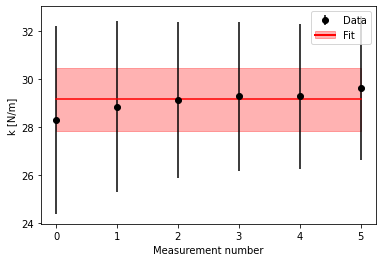

In [21]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.errorbar(x_values, unumpy.nominal_values(k), unumpy.std_devs(k), fmt='o', label='Data', color='black')

# draw the fit function and its uncertainty band
x_fit = np.linspace(0, 5, 100)
kfit = np.full(100, nom[0])
kfit_lower = np.full(100, nom[0] - np.sqrt(cov[0,0]))
kfit_upper = np.full(100, nom[0] + np.sqrt(cov[0,0]))
plt.plot(x_fit, kfit, 'r-')
plt.fill_between(x_fit, kfit_lower, kfit_upper, color='red', alpha=0.3)

# create a legend entry for the fit function and its uncertainty band
line_with_band = mpl.lines.Line2D([], [], color='red', label='Fit', linestyle='-', linewidth=2)
band = mpl.patches.Patch(color='red', alpha=0.3, label='Fit uncertainty')

# get the current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles + [(line_with_band, band)], labels=labels + ['Fit'])

# finally, plot
plt.xlabel('Measurement number')
plt.ylabel('k [N/m]')
plt.show()

#### More realistic example

Instead of calculating the spring stiffness values and fitting the results with a constant function, we can fit the linear dependence of the $mg$ product on the displacement. Such a fit is particularly simple when the uncertainty on the $x$-axis values are negligible. This is exactly our situation, and we will neglect them. On the other hand, we will treat the uncertainties on the $y$-axis values properly.

In [22]:
product = m * g
print(product)
nom, cov = scipy.optimize.curve_fit(lambda x, a : a * x,
                                      unumpy.nominal_values(dy),
                                      unumpy.nominal_values(product),
                                      sigma=unumpy.std_devs(product),
                                      absolute_sigma=True)
print(nom[0], '+/-', np.sqrt(cov[0,0]))

[1.4715+/-0.1471576450613423 1.9620000000000002+/-0.19621019341512305
 2.943+/-0.2943152901226846 3.9240000000000004+/-0.3924203868302461
 5.886+/-0.5886305802453692 8.829+/-0.8829458703680539]
29.068505008643758 +/- 1.186903692932027


Let's plot the result:

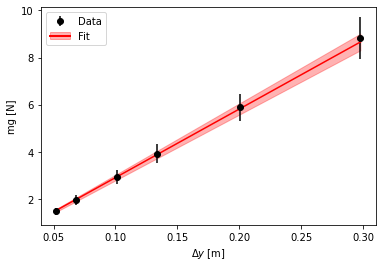

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt

x_values = unumpy.nominal_values(dy)
plt.errorbar(x_values, unumpy.nominal_values(product), unumpy.std_devs(product), fmt='o', label='Data', color='black')

# draw the fit function and its uncertainty band
x_fit = np.linspace(x_values.min(), x_values.max(), 100)
fit       = nom[0] * x_fit
fit_lower = (nom[0] - np.sqrt(cov[0,0])) * x_fit
fit_upper = (nom[0] + np.sqrt(cov[0,0])) * x_fit
plt.plot(x_fit, fit, 'r-')
plt.fill_between(x_fit, fit_lower, fit_upper, color='red', alpha=0.3)

# create a legend entry for the fit function and its uncertainty band
line_with_band = mpl.lines.Line2D([], [], color='red', label='Fit', linestyle='-', linewidth=2)
band = mpl.patches.Patch(color='red', alpha=0.3, label='Fit uncertainty')

# get the current legend handles and labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles + [(line_with_band, band)], labels=labels + ['Fit'])

# finally, plot
plt.xlabel(r'$\Delta y$ [m]')
plt.ylabel('mg [N]')
plt.show()

# Final remarks

- The `uncertainties` `unumpy` module defines various special functions that can act on `unumpy.uarray` objects. For example:

In [24]:
x = unumpy.uarray([1, 2, 3, 4, 5], 0.1) # Note: with this syntax, each value is assigned the same uncertainty

unumpy.log(x)
unumpy.exp(x)
unumpy.sqrt(x)
unumpy.sin(x)
unumpy.cos(x)

array([0.5403023058681398+/-0.08414709848078966,
       -0.4161468365471424+/-0.09092974268256818,
       -0.9899924966004454+/-0.014112000805986721,
       -0.6536436208636119+/-0.07568024953079283,
       0.28366218546322625+/-0.09589242746631385], dtype=object)

- When it comes to reading data from files, the `pandas` library is very useful. It provides data structures and functions for data manipulation and analysis. The `pandas.read_csv` function reads data from a CSV file and returns a `DataFrame` object. Similarly, the `pandas.read_excel` reads data from an MS Excel file. The `DataFrame` object is a two-dimensional, size-mutable, and labeled data structure with columns of potentially different types. It's a powerful Python analogue of the Excel spreadsheet. Each `pandas` column can be manipulated like a NumPy array!
  - Tutorial for beginners: https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html 
  - Jupyter Notebook with basics: https://colab.research.google.com/drive/1ZfXYRcqXLiWT97oF4qiMmLE1LvXQPEU9?usp=sharing 

- Pandas can be used to display nice tables in a Jupyter notebook.

In [ ]:
from pandas import DataFrame

data = {
    'dy'    : [0.052, 0.068, 0.101, 0.134, 0.201, 0.298],
    'dy_unc': [0.005] * 6,
    'm'     : [150, 200, 300, 400, 600, 900],
    'm_unc' : [15, 20, 30, 40, 60, 90],
}
df = DataFrame(data)
print(df)

# As you can see, the column names are displayed when the DataFrame is printed.
# To display longer names, e.g. containing the units, you can use the following code:
display_names = {'dy'    : 'Delta y [m]',
                 'dy_unc': '\Delta y unc. [m]',
                 'm'     : 'm [g]',
                 'm_unc' : 'm unc. [g]',}
print(df.rename(columns=display_names))

- For plotting a data as a graph and a fit function, you can use the following function. Feel free to modify it to suit your needs!

In [48]:
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot(x, y, y_err, x_fit, y_fit, y_fit_lower, y_fit_upper, xlabel, ylabel):

    # draw x, y with error bars
    plt.errorbar(x, y, y_err, fmt='o', label='Data', color='black')

    # draw the fit function and its uncertainty band
    plt.fill_between(x_fit, y_fit_lower, y_fit_upper, color='red', alpha=0.3)

    # create a legend entry for the fit function and its uncertainty band
    line_with_band = mpl.lines.Line2D([], [], color='red', label='Fit', linestyle='-', linewidth=2)
    band = mpl.patches.Patch(color='red', alpha=0.3, label='Fit uncertainty')

    # get the current legend handles and labels
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles=handles + [(line_with_band, band)], labels=labels + ['Fit'])

    # finally, plot
    plt.plot(x_fit, y_fit, 'r-')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

    return

- The following example shows you how to prepare a fit function and its uncertainty for plotting in situations where the fit function parameters are correlated. Note:
- `uncertainties.correlated_values` creates a tuple of correlated variables.
- `uncertainties.wrap` needs to be called on a custom function to create a similar one that can handle `ufloat` arguments.

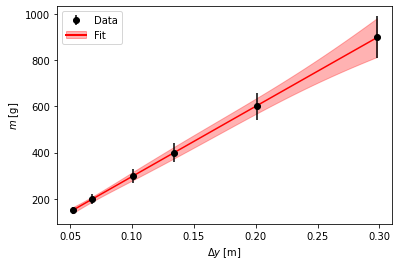

In [52]:
import scipy
from uncertainties import unumpy
from pandas import DataFrame

# the data
data = {
    'dy'    : [0.052, 0.068, 0.101, 0.134, 0.201, 0.298],
    'dy_unc': [0.005] * 6,
    'm'     : [150, 200, 300, 400, 600, 900],
    'm_unc' : [15, 20, 30, 40, 60, 90],
}
df = DataFrame(data)

# define the quadratic fit function
def quadratic(x, a, b, c):
    return a*x*x + b*x + c

# fit the quadratic function to the data
nom, cov = scipy.optimize.curve_fit(quadratic, df['dy'], df['m'], sigma=df['m_unc'], absolute_sigma=True)

# to draw the fit function and its uncertainty band, we need to evaluate the fit function at many points
x = np.linspace(df['dy'].min(), df['dy'].max(), 100)
a, b, c = uncertainties.correlated_values(nom, cov)
wrapped_quadratic = uncertainties.wrap(quadratic)
y_fit_list = [wrapped_quadratic(x, a, b, c) for x in x]
y_fit     = np.array([y.nominal_value for y in y_fit_list])
sigma_fit = np.array([y.std_dev       for y in y_fit_list])

# plot the data and the fit function with its uncertainty band
plot(df['dy'], df['m'], df['m_unc'], x, y_fit, y_fit - sigma_fit, y_fit + sigma_fit, '$\Delta y$ [m]', '$m$ [g]')
